# Tiesinė regresija 

In [2]:
# 1. Bibliotekų importavimas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [3]:
# Nustatome URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Įkeliame duomenis iš URL
df = pd.read_csv(url)

# Išsaugome kaip CSV failą į kompiuterį (pavyzdžiui, į tą pačią direktoriją)
df.to_csv("BostonHousing.csv", index=False)

print("Failas 'BostonHousing.csv' sėkmingai išsaugotas!")


Failas 'BostonHousing.csv' sėkmingai išsaugotas!


In [4]:
#  2. Duomenų įkėlimas
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.columns = [col.lower() for col in df.columns]  # visus stulpelių pavadinimus paverčiame į mažąsias raides
df = df.drop(columns=['b'])

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# 🏠 Boston Housing Dataset – Stulpelių aprašymas

| Stulpelis   | Tipas   | Paaiškinimas |
|-------------|---------|--------------|
| `crim`      | 🕵️‍♂️ Float | Nusikalstamumo lygis vienam gyventojui |
| `zn`        | 🏡 Float | Žemės dalis vienbučiams namams (procentais) |
| `indus`     | 🏭 Float | Pramoninių zonų dalis rajone |
| `chas`      | 🌊 Int   | Ar šalia yra Charles upė (1 – taip, 0 – ne) |
| `nox`       | 🛑 Float | Azoto oksidų koncentracija ore (tarša) |
| `rm`        | 🛏️ Float | Vidutinis kambarių skaičius name |
| `age`       | 📅 Float | Pastatų, pastatytų iki 1940 m., procentas |
| `dis`       | 🚗 Float | Atstumas iki penkių pagrindinių darbo centrų |
| `rad`       | 🚦 Int   | Prieiga prie greitkelių (kategorinis kodas) |
| `tax`       | 💸 Int   | Turto mokesčio tarifas (už 10 000 USD) |
| `ptratio`   | 🧑‍🏫 Float | Mokinių ir mokytojų santykis |
| `lstat`     | 📉 Float | Mažų pajamų grupės procentas rajone |
| `medv`      | 💰 Float | **Namų kaina (tūkst. dolerių)** – tai mūsų TARGET kintamasis |
---

In [5]:
#  3.1 Duomenų analizė
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [6]:
#  3.2 Duomenų analizė
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
df.info

<bound method DataFrame.info of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2      

In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

# Ką rodo koreliacijų matrica?

Kiekvienas langelis rodo **koreliacijos koeficientą** tarp dviejų kintamųjų.

Koreliacija svyruoja nuo **-1 iki 1**:

**+1** - reiškia tobulą teigiamą ryšį

**-1** – tobulą neigiamą ryšį

**0** – jokio tiesioginio ryšio

<function matplotlib.pyplot.show(close=None, block=None)>

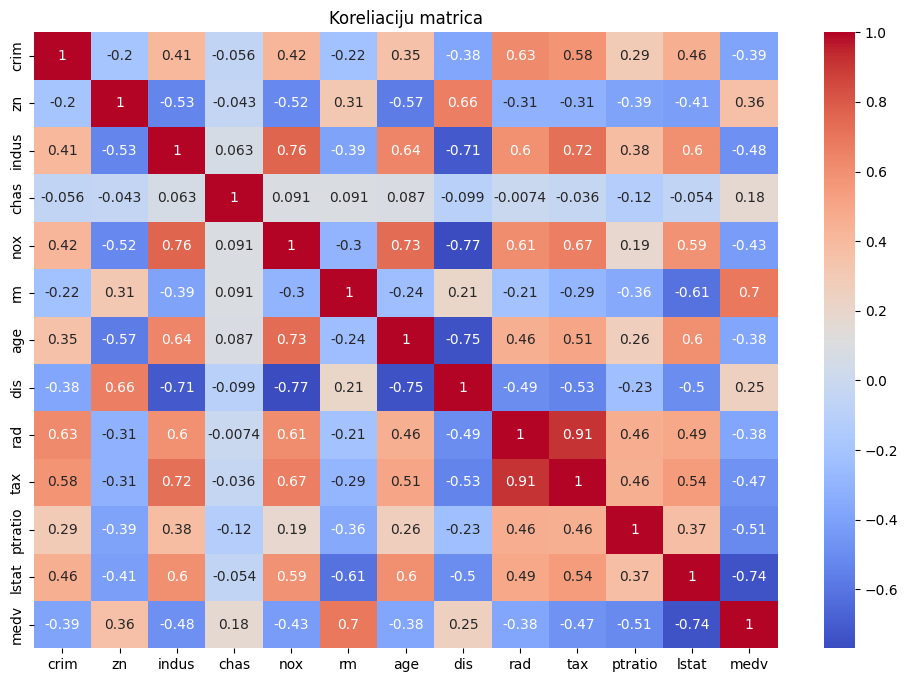

In [9]:
# Užduotis 1: Kurie požymiai koreliuoja labiausiai su namų kaina (medv)?
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Koreliaciju matrica')
plt.show


# Koreliacijų Matricos Analizė

In [10]:
features = ['rm', 'lstat', 'ptratio', 'indus', 'nox', 'rad']
X = df[features]
#  intercept reiksme (konstanta)
X = add_constant(X)
# Apskaiciuojame kiekvienam kintamajam VIF rodikli (pagal ji paziurim kurie panasus ir istrinam, kuo aukstesne reiksme VIF tuo maziau reiksminga, vadinasi ta ir ismetam, siuo atveju tax (virs 8))
vif_data = pd.DataFrame()
vif_data["Kintamasis"] = X.columns
vif_data["VIF reikšmė"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Kintamasis  VIF reikšmė
0      const   394.879522
1         rm     1.742556
2      lstat     2.432773
3    ptratio     1.567493
4      indus     2.951930
5        nox     3.116995
6        rad     2.105305


# VIF (Variance Inflation Factor) analizė

## Skaičiavimo rezultatai

| Kintamasis | VIF reikšmė | Interpretacija |
|------------|-------------|----------------|
| `const`    | **411.79**  | Labai aukšta – tai modelio interceptas, galima ignoruoti |
| `rm`       | 1.75        | ✅ Žema VIF – saugu naudoti |
| `lstat`    | 2.43        | ✅ Žema VIF – saugu naudoti |
| `ptratio`  | 1.57        | ✅ Puiki reikšmė |
| `indus`    | 3.52        | ⚠️ Vidutinė koreliacija su kitais – stebėtinas |
| `nox`      | 3.12        | ⚠️ Vidutinė koreliacija – galima palikti |
| `tax`      | **8.27**    | ❗ Aukštas VIF – galimas multikolinearumas |
| `rad`      | **6.69**    | ❗ Aukštas VIF – ypač su `tax`, patikrink koreliacijų matricą |

---

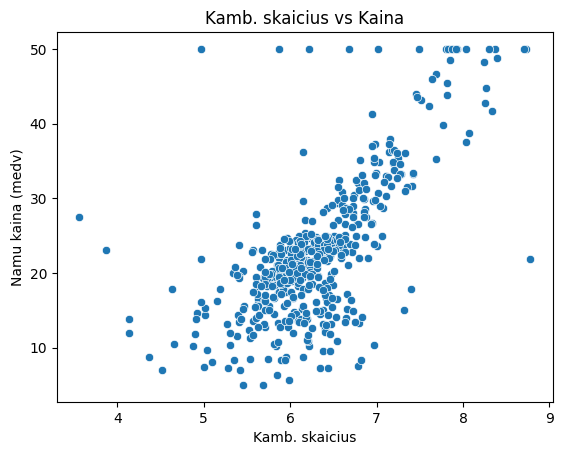

In [11]:
# Užduotis 2: Nubraižykite "rm" (kambarių skaičius) ir "medv" (kaina) sklaidos grafiką
sns.scatterplot(x='rm',y='medv', data=df)
plt.title("Kamb. skaicius vs Kaina")
plt.xlabel("Kamb. skaicius")
plt.ylabel("Namu kaina (medv)")
plt.show()

# Sklaidos diagramos analizė: `rm` vs `medv`

Ši diagrama parodo, kaip kinta **namų kaina** (`medv`) priklausomai nuo **kambarių skaičiaus** (`rm`) Bostono būsto duomenų rinkinyje.

---

# Duomenų paruošimas tiesinei regresijai

Šiame žingsnyje mes pasiruošiame duomenis modelio kūrimui.
 Panaudosime **vieną požymį** – `rm` (vidutinis kambarių skaičius), kad prognozuotume `medv` (namų kainą).

---

## 1. Kodo fragmentas: duomenų atskyrimas

```python
from sklearn.model_selection import train_test_split

# X – požymiai (features), y – tikslas (target)
X = df[["rm"]]      # Vidutinis kambarių skaičius
y = df["medv"]      # Namų kaina

# Padalijame į mokymo ir testavimo duomenis
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
# 4. Duomenų paruošimas modeliui
X = df[["rm", "lstat", "ptratio", "indus", "nox", "rad"]]
y = df["medv"]
 
# padaliname į mokymo ir testavimo duomenis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Teorinis paaiškinimas

| **Kintamasis**   | **Reikšmė**                                                                 |
|------------------|------------------------------------------------------------------------------|
| `X`              | Nepriklausomas kintamasis: `rm` (vidutinis kambarių skaičius)               |
| `y`              | Priklausomas kintamasis: `medv` (vidutinė namų kaina)                       |
| `test_size`      | `0.2` reiškia, kad 20% duomenų skiriama testavimui                          |
| `random_state`   | Užtikrina, kad duomenų padalijimas visada bus toks pat  |


## 3. Duomenų padalijimo vizualizacija

In [13]:
# plt.figure(figsize=(10, 5))
 
# # Mokymo duomenys (mėlyna)
# plt.scatter(X_train, y_train, color="blue", label="Mokymo duomenys", alpha=0.6)
 
# # Testavimo duomenys (raudona)
# plt.scatter(X_test, y_test, color="red", label="Testavimo duomenys", alpha=0.6)
 
# plt.xlabel("Kambarių skaičius (rm)")
# plt.ylabel("Namų kaina (medv)")
# plt.title("Duomenų padalijimas: Mokymo vs Testavimo")
# plt.legend()
# plt.grid(True)
# plt.show()
 

## 4. Kodėl tai svarbu?
**Mokymo duomenys (X_train, y_train)** naudojami modelio kūrimui.

**Testavimo duomenys (X_test, y_test)** naudojami modelio tikslumo įvertinimui.

Jei neskirstytume duomenų – rizikuotume permokyti (**overfitting**) modelį, kuris „išmoktų atmintinai“, bet nesugebėtų prognozuoti naujų duomenų.

In [14]:
# 5. Modelio kūrimas
model= LinearRegression()
# Modelio apmokymas su mokymo duomenimis
model.fit(X_train, y_train)
 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# 6. Modelio koeficientai (jei vienas kambarys kaina didėja 9.1 tūkst. dolerių, jei 2 kambariai, tai 18.2 tūkst. dolerių ir t.t.)
print("Modelio koeficientas", model.coef_[0])
print("Interceptas:", model.intercept_)

Modelio koeficientas 5.043746324819822
Interceptas: 16.152826406189128


In [16]:
# 7. Prognozavimas (patikrinimas ar gerai suprognozavo)
y_pred = model.predict(X_test)

## Vertinimas

### Teorinis paaiškinimas

---

#### `mean_squared_error(y_test, y_pred)` – Vidutinė kvadratinė paklaida (MSE)

Formulė:

$$ MSE = (1/n) * Σ (yᵢ − ŷᵢ)² $$

Kur:

- `yᵢ` – tikros reikšmės (testavimo rinkinys)  
- `ŷᵢ` – prognozuotos reikšmės  
- `n` – įrašų skaičius  

**Ką reiškia:**  
MSE parodo, kiek **vidutiniškai mūsų modelis klysta kvadratu**.  
Kuo **mažesnė MSE**, tuo geresnis modelis.  
Matuojama **tūkstančiais dolerių kvadratu**.

---

#### `r2_score(y_test, y_pred)` – R² (determinacijos koeficientas)

Formulė:

$$ R² = 1 − (Σ(yᵢ − ŷᵢ)² / Σ(yᵢ − ȳ)²) $$

Kur:

- `ȳ` – tikrųjų reikšmių vidurkis  

 **Ką reiškia:**  
R² parodo, kiek procentų kintamumo modelis paaiškina.

- `1.0` = tobulas atitikimas  
- `0.0` = modelis nieko nepaaiškina  
- `R² < 0` = blogiau nei tiesiog spėti vidurkį  

---

###  Kodėl tai svarbu?

- **MSE** leidžia pamatyti **vidutinę modelio klaidą**, tarsi „baudos taškus“.
- **R²** leidžia įvertinti modelio **paaiškinamąją galią**.

Šios dvi metrikos **kartu pateikia išsamų modelio tikslumo vaizdą**.


In [17]:
# 8. Vertinimas
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

MSE: 27.31828896124759
R-squared: 0.6274801628394909


In [18]:
# MSE = 46.14 = 6.8 (kvardatu (istraukiam sakny)
# modelis paaiskina 37% paklaidu (netikslu),reiktu daugiau kintamuju X

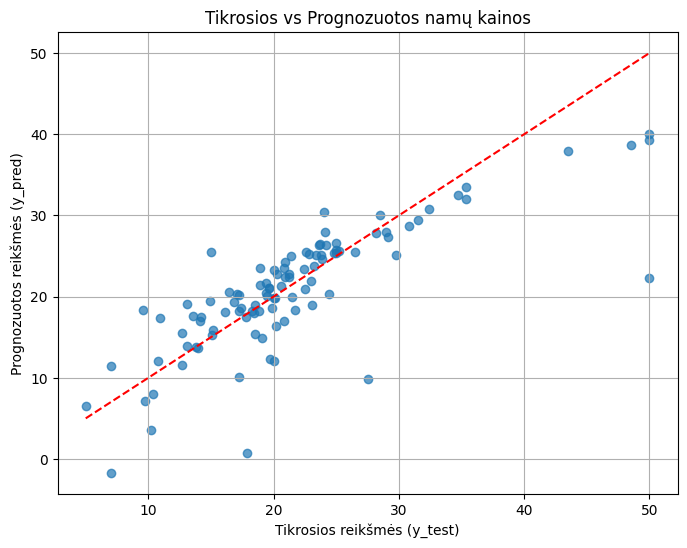

In [19]:
# 9. Vizualizacija: Tikros vs Prognozuotos kainos

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # tobulas sutapimas
plt.xlabel("Tikrosios reikšmės (y_test)")
plt.ylabel("Prognozuotos reikšmės (y_pred)")
plt.title("Tikrosios vs Prognozuotos namų kainos")
plt.grid(True)
plt.show()

Ką matysim:

Jei taškai arti raudonos linijos – modelis tikslus

Jei taškai toli – modelis klysta

## 10. Paklaidų analizė

---



##  Teorija: Kokia turi būti gera paklaidų forma?
 Idealus atvejis:
Paklaidos pasiskirsto simetriškai aplink nulį

Turi varpo formą

Nėra aiškios šališkumo krypties – nei į pliusą, nei į minusą

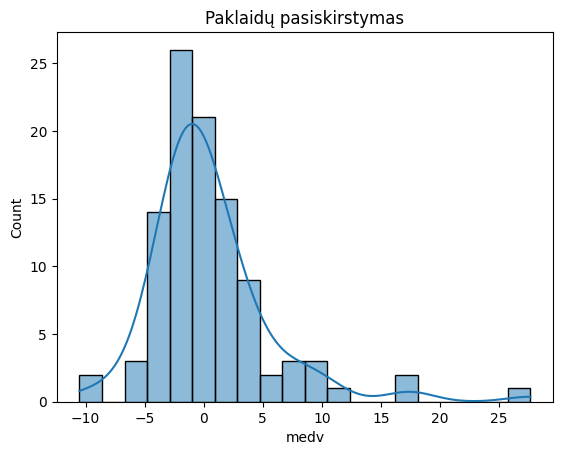

In [20]:
# 10. Paklaidų analizė
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Paklaidų pasiskirstymas")
plt.show()

## Išvada:

Tavo modelio paklaidos daugiausia pasiskirsto normaliai, kas yra gero modelio ženklas 

Nors yra keletas išsiskiriančių klaidų, bendra struktūra rodo, kad:

Modelis nenukrypsta sistemingai (nei per dažnai pervertina, nei nuvertina)

---

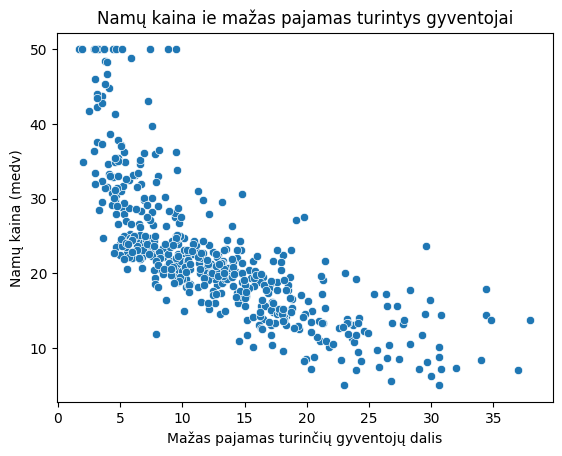

In [21]:
# Užduotis 2: Nubraižykite "rm" (kambarių skaičius) ir "medv" (kaina) sklaidos grafiką
sns.scatterplot(x="lstat", y="medv", data=df)
plt.title("Namų kaina ie mažas pajamas turintys gyventojai")
plt.xlabel("Mažas pajamas turinčių gyventojų dalis")
plt.ylabel("Namų kaina (medv)")
plt.show()

### Pasirinkti ar su keliais ar su visais kintamaisiais geresnis variantas

In [22]:
# 4. Duomenų paruošimas modeliui
X = df[["rm"]] 
y = df["medv"] # buto, namo kaina
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# # 4. Duomenų paruošimas modeliui
# X = df[[]] 
# y = df["medv"] # buto, namo kaina
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# 5. Modelio kūrimas
model = LinearRegression()

# Modelio apmokymas su mokymo duomenimis
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
# 7. Prognozavimas
y_pred = model.predict(X_test)

In [26]:
# 8. Vertinimas
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

MSE: 46.144775347317264
R-squared: 0.3707569232254778


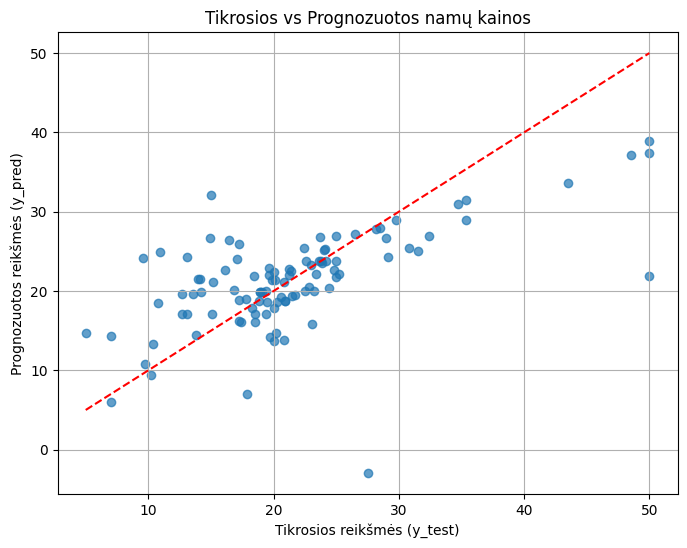

In [27]:
# 9. Vizualizacija: Tikros vs Prognozuotos kainos

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # tobulas sutapimas
plt.xlabel("Tikrosios reikšmės (y_test)")
plt.ylabel("Prognozuotos reikšmės (y_pred)")
plt.title("Tikrosios vs Prognozuotos namų kainos")
plt.grid(True)
plt.show()

<!-- AIC ir BIC kita pamoka -->

In [28]:
from sklearn.datasets import load_linnerud
import statsmodels.api as sm

In [29]:
# duomenu paruosimas modeliui
X = df[["rm", "tax","nox", "lstat"]]
y = df["medv"]  # buto, namo kaina
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42

_IncompleteInputError: incomplete input (1843650964.py, line 4)

In [ ]:
# Pridedam konstantą prie TRAIN ir kuriam modelį
model = sm.OLS(y_train, sm.add_constant(X_train, has_constant="add")).fit()
 
# Rezultatai
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     196.6
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           6.26e-93
Time:                        19:19:11   Log-Likelihood:                -1255.1
No. Observations:                 404   AIC:                             2520.
Df Residuals:                     399   BIC:                             2540.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4753      3.586     -1.248      0.2

In [ ]:
print("AIC:", model.aic)
print("BIC:", model.bic)

AIC: 2520.2984637850595
BIC: 2540.3055381748654
